# Week 2 — Understanding Market Data

## Goals

* Load saved data
* Explore structure
* Plot price
* Compute daily returns



## Save data function

In [9]:
import yfinance as yf
import pandas as pd
from pathlib import Path

def save_stock_data(ticker: str, start: str, end: str) -> pd.DataFrame:
    """
    This kickass function is going to get stock data from yfinance and return a cleaned DataFrame.
    """
    df = yf.download(ticker, start=start, end=end)
    df.columns = df.columns.droplevel("Ticker")  # if the level is named
    df = df[["Open", "High", "Low", "Close", "Volume"]]
    df = df.sort_index()
    print(f"Data fetched successfully for ticker {ticker} from {start} to {end}.")
    # Create a directory to save data if it doesn't exist
    Path("../data").mkdir(parents=True, exist_ok=True)

    # Save the data to a CSV file
    df.to_csv(f"../data/{ticker}.csv")
    print(f"data saved to data/{ticker}.csv")
    #return df

In [11]:
stock_ticker = "TSLA"
start_date = "2020-01-01"
end_data = "2020-12-30"

save_stock_data(stock_ticker, start_date, end_data)

[*********************100%***********************]  1 of 1 completed

Data fetched successfully for ticker TSLA from 2020-01-01 to 2020-12-30.
data saved to data/TSLA.csv


## Load data

Let's start by loading the data we saved in lesson one (TSLA.csv) from the data folder in our root folder

In [16]:
import pandas as pd
#stock_ticker="TSLA"
df = pd.read_csv(f"../data/{stock_ticker}.csv", index_col=0, parse_dates=True)
print(df.head())

                 Open       High        Low      Close     Volume
Date                                                             
2020-01-02  28.299999  28.713333  28.114000  28.684000  142981500
2020-01-03  29.366667  30.266666  29.128000  29.534000  266677500
2020-01-06  29.364668  30.104000  29.333332  30.102667  151995000
2020-01-07  30.760000  31.441999  30.224001  31.270666  268231500
2020-01-08  31.580000  33.232666  31.215334  32.809334  467164500


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,95.315328,98.006172,92.506106,95.576106,2.266185e+08
std,54.837959,56.133556,53.345509,55.207419,1.206347e+08
min,24.980000,26.990667,23.367332,24.081333,5.207310e+07
25%,49.315001,51.590668,47.610666,49.901001,1.421925e+08
50%,72.199997,75.688667,72.033333,74.641998,2.112825e+08
75%,140.235001,143.113335,136.586670,140.268333,2.844296e+08
max,224.836670,231.666672,220.266663,231.666672,9.140820e+08


## Plot closing price


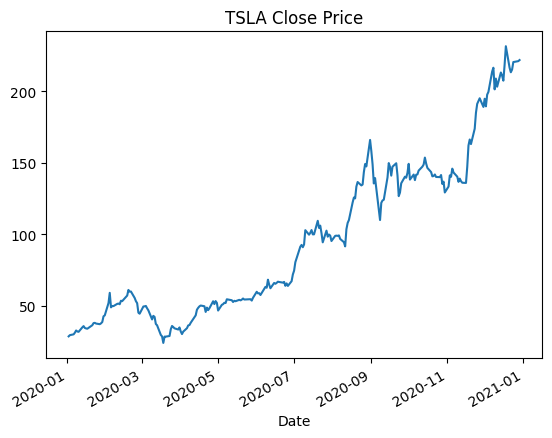

In [17]:
import matplotlib.pyplot as plt

df["Close"].plot(title=f"{stock_ticker} Close Price")
plt.show()

<Axes: ylabel='Frequency'>

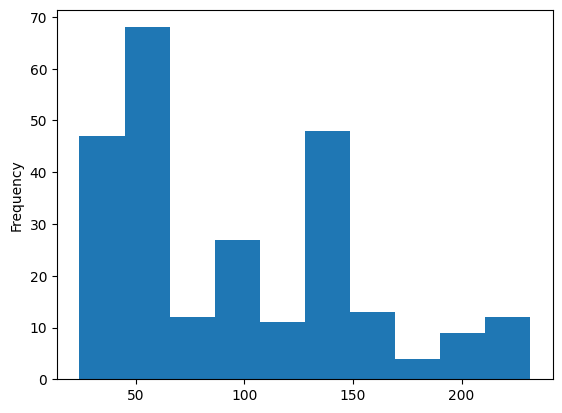

In [22]:
df['Close'].plot.hist()


## Daily returns

now we're going to look at percent change calculations

In [23]:

df["Return"] = df["Close"].pct_change()
print(df[["Close", "Return"]].head())


                Close    Return
Date                           
2020-01-02  28.684000       NaN
2020-01-03  29.534000  0.029633
2020-01-06  30.102667  0.019255
2020-01-07  31.270666  0.038801
2020-01-08  32.809334  0.049205


<Axes: ylabel='Frequency'>

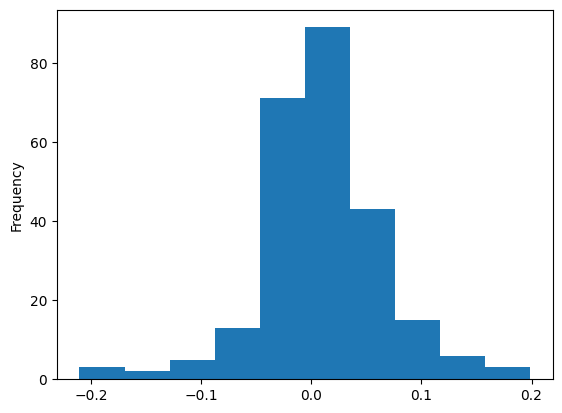

In [24]:
df["Return"].plot.hist()

## extra work for you adsi

look at different ways you may want to add percent change (returns) to your dataframe. 
look at adding a new column to your dataframe which has percent change in it.
maybe extend your function to have that column in it as well

In [25]:
df.head()

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,142981500,NaN
2020-01-03,29.366667,30.266666,29.128000,29.534000,266677500,0.029633
2020-01-06,29.364668,30.104000,29.333332,30.102667,151995000,0.019255
2020-01-07,30.760000,31.441999,30.224001,31.270666,268231500,0.038801
2020-01-08,31.580000,33.232666,31.215334,32.809334,467164500,0.049205


In [31]:
df["Prev_Close"]=df["Close"].shift(1)

In [32]:
df.head()

,Open,High,Low,Close,Volume,Return,Prev_Close
Date,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,142981500,NaN,NaN
2020-01-03,29.366667,30.266666,29.128000,29.534000,266677500,0.029633,28.684000
2020-01-06,29.364668,30.104000,29.333332,30.102667,151995000,0.019255,29.534000
2020-01-07,30.760000,31.441999,30.224001,31.270666,268231500,0.038801,30.102667
2020-01-08,31.580000,33.232666,31.215334,32.809334,467164500,0.049205,31.270666


In [33]:
df["Return_2"]=df["Close"]/df["Prev_Close"]-1

In [34]:
df.head()

,Open,High,Low,Close,Volume,Return,Prev_Close,Return_2
Date,,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,142981500,NaN,NaN,NaN
2020-01-03,29.366667,30.266666,29.128000,29.534000,266677500,0.029633,28.684000,0.029633
2020-01-06,29.364668,30.104000,29.333332,30.102667,151995000,0.019255,29.534000,0.019255
2020-01-07,30.760000,31.441999,30.224001,31.270666,268231500,0.038801,30.102667,0.038801
2020-01-08,31.580000,33.232666,31.215334,32.809334,467164500,0.049205,31.270666,0.049205
